In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_row',None)

In [319]:
dataset =pd.read_csv('modified_allergy.csv')
print(dataset.shape)

(794, 7)


In [320]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for features in features_with_na:
    print(features, np.round(dataset[features].isnull().mean(),4), '%missing values')

DESCRIPTION1 0.4836 %missing values
SEVERITY1 0.4836 %missing values
DESCRIPTION2 0.6738 %missing values
SEVERITY2 0.6738 %missing values


In [321]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O' and feature not in ['DESCRIPTION', 'TYPE','CATEGORY']]
categorical_features

['DESCRIPTION1', 'SEVERITY1', 'DESCRIPTION2', 'SEVERITY2']

In [322]:
for feature in categorical_features:
    print('The feature is {} and number of unique categories are {}'.format(feature,len(dataset[feature].unique()))) 

The feature is DESCRIPTION1 and number of unique categories are 19
The feature is SEVERITY1 and number of unique categories are 4
The feature is DESCRIPTION2 and number of unique categories are 15
The feature is SEVERITY2 and number of unique categories are 3


My dependent features are Description and typea and cateogry and categorial features are remaining. I am trying to check that on providing discription and severity of problem it can tell that what is causing that and whether it is allergy or intolerance.

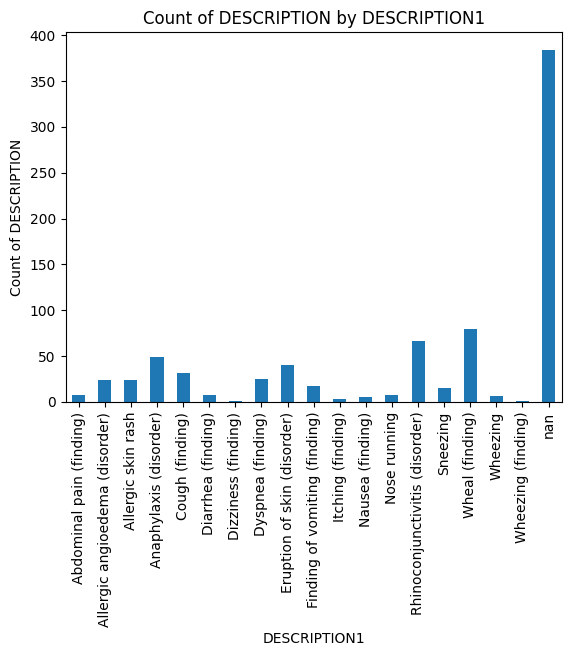

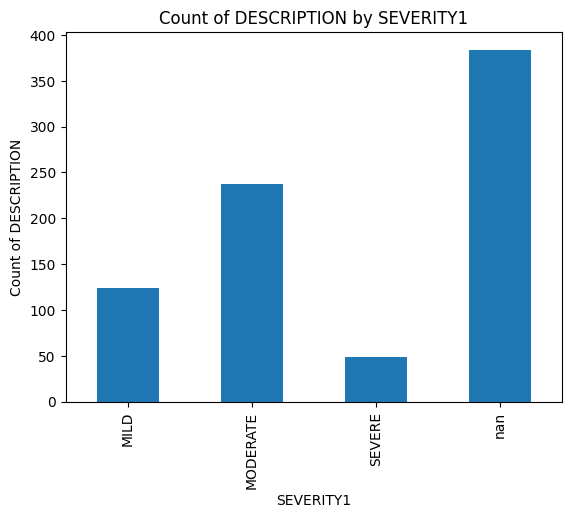

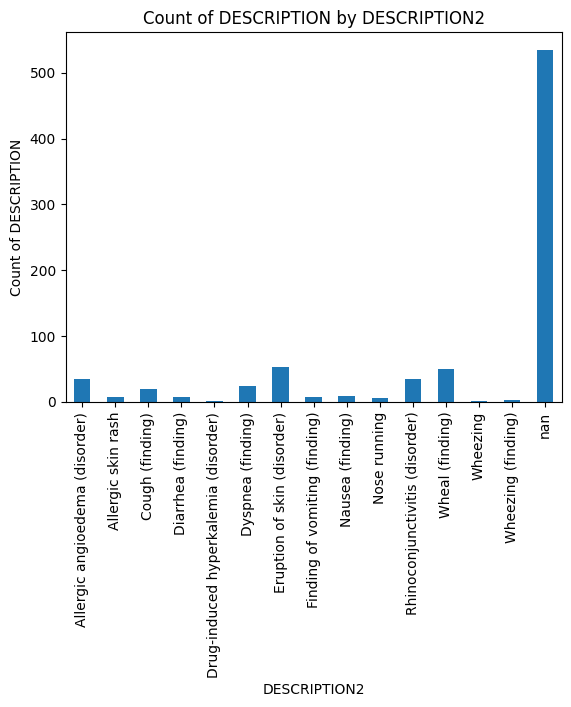

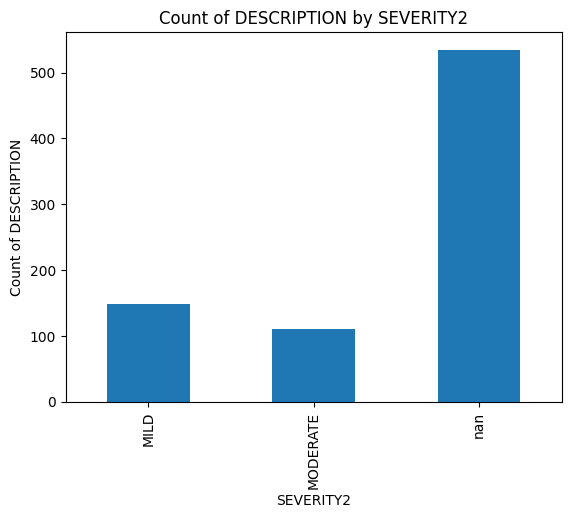

In [323]:
for feature in categorical_features:
    data = dataset.copy()
    data[feature] = data[feature].astype(str)  # Ensure the feature is treated as a string
    counts = data.groupby(feature)['DESCRIPTION'].count()
    counts.plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Count of DESCRIPTION')
    plt.title(f'Count of DESCRIPTION by {feature}')
    plt.show()


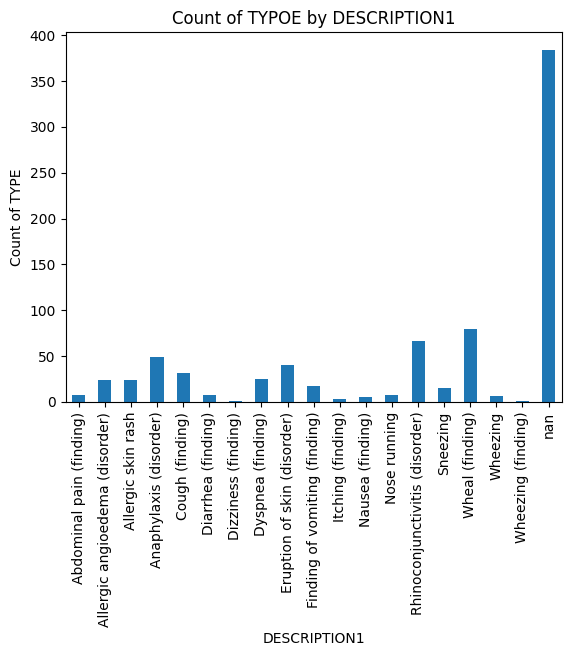

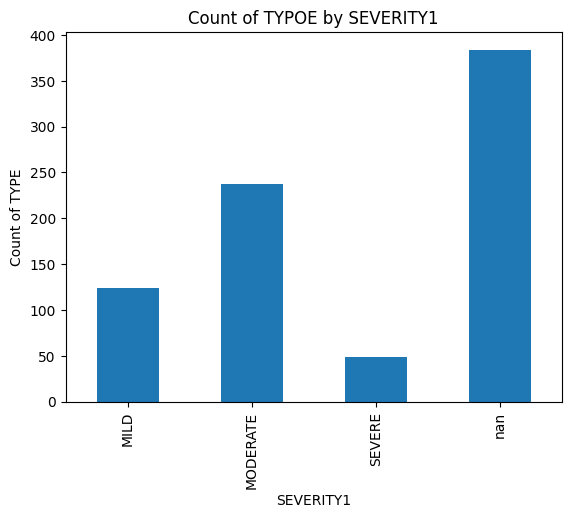

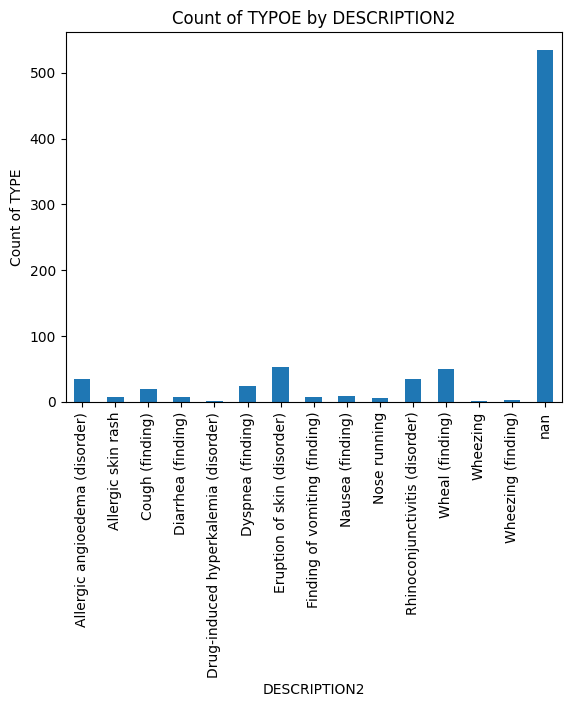

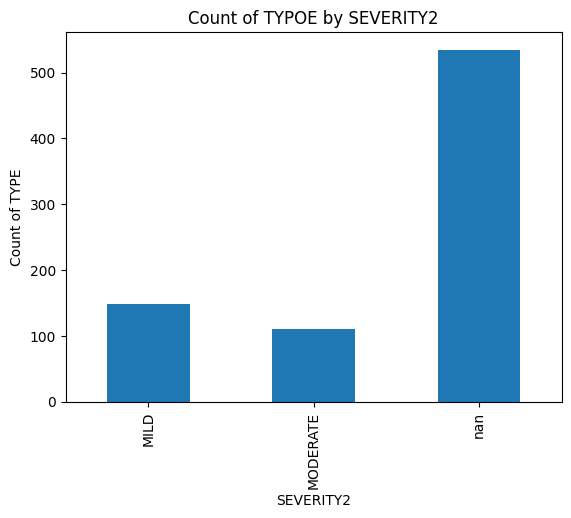

In [324]:
for feature in categorical_features:
    data = dataset.copy()
    data[feature] = data[feature].astype(str)  # Ensure the feature is treated as a string
    counts = data.groupby(feature)['TYPE'].count()
    counts.plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Count of TYPE')
    plt.title(f'Count of TYPOE by {feature}')
    plt.show()

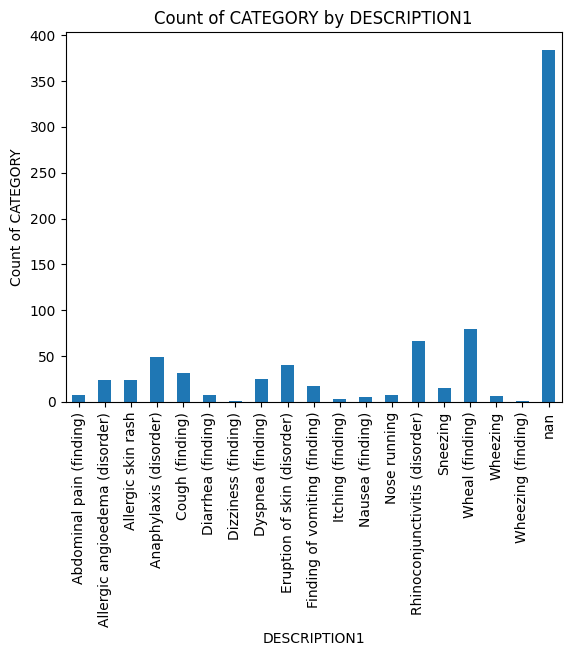

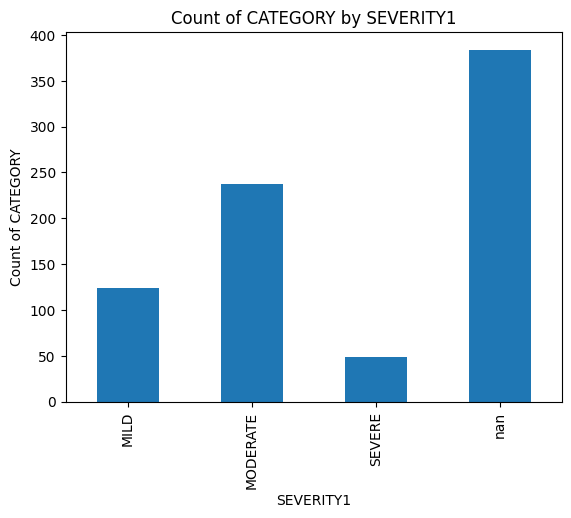

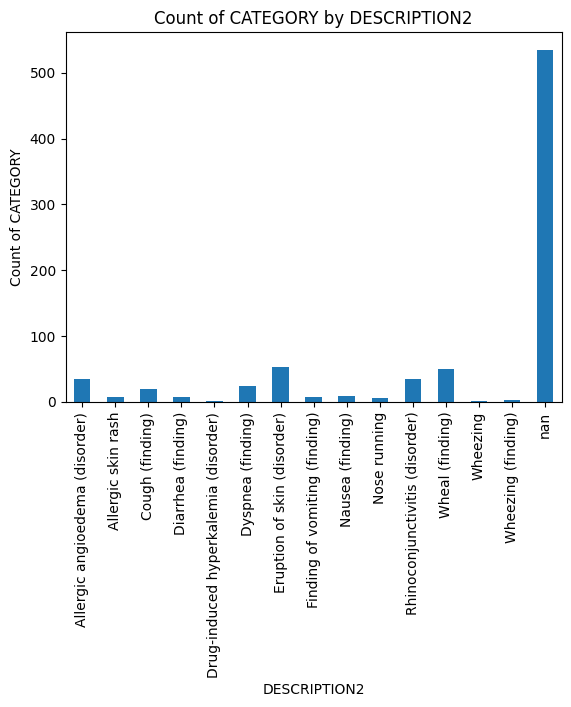

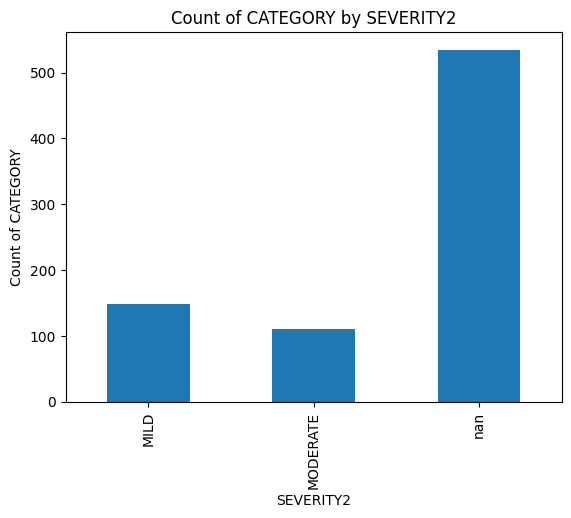

In [325]:
for feature in categorical_features:
    data = dataset.copy()
    data[feature] = data[feature].astype(str)  # Ensure the feature is treated as a string
    counts = data.groupby(feature)['CATEGORY'].count()
    counts.plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Count of CATEGORY')
    plt.title(f'Count of CATEGORY by {feature}')
    plt.show()

In [326]:
dependent_features =['DESCRIPTION','TYPE','CATEGORY']
dependent_features

['DESCRIPTION', 'TYPE', 'CATEGORY']

In [327]:
for features in dependent_features:
    print('The feature is {} and number of unique categories are {}'.format(features,len(dataset[features].unique()))) 

The feature is DESCRIPTION and number of unique categories are 21
The feature is TYPE and number of unique categories are 2
The feature is CATEGORY and number of unique categories are 3


In [328]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset[['DESCRIPTION','TYPE','CATEGORY']],test_size=0.1,random_state=0)

In [329]:
features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print('{}: {}% missing values'.format(feature,np.round(dataset[feature].isnull().mean())))

DESCRIPTION1: 0.0% missing values
SEVERITY1: 0.0% missing values
DESCRIPTION2: 1.0% missing values
SEVERITY2: 1.0% missing values


In [330]:
## Replacing all missing value with a new lable
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('nan')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

DESCRIPTION1    0
SEVERITY1       0
DESCRIPTION2    0
SEVERITY2       0
dtype: int64

Feature Scaling

In [331]:
feature_scale = [feature for feature in dataset.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

ValueError: could not convert string to float: 'Latex (substance)'